In [7]:
import keras
from keras.api.datasets import mnist
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout, Activation
from keras.api.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.api.layers import BatchNormalization
import h5py

# 自分で設定するパラメータ

# バッチサイズ
batch_size = 2000

# エポック数
epochs = 100



# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 2つ目の隠れ層(256 -> 出力128)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3つ目の隠れ層(128 -> 出力32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 出力層(入力32 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


KeyboardInterrupt: 

In [2]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9152 - loss: 0.2808


[0.24240942299365997, 0.929099977016449]

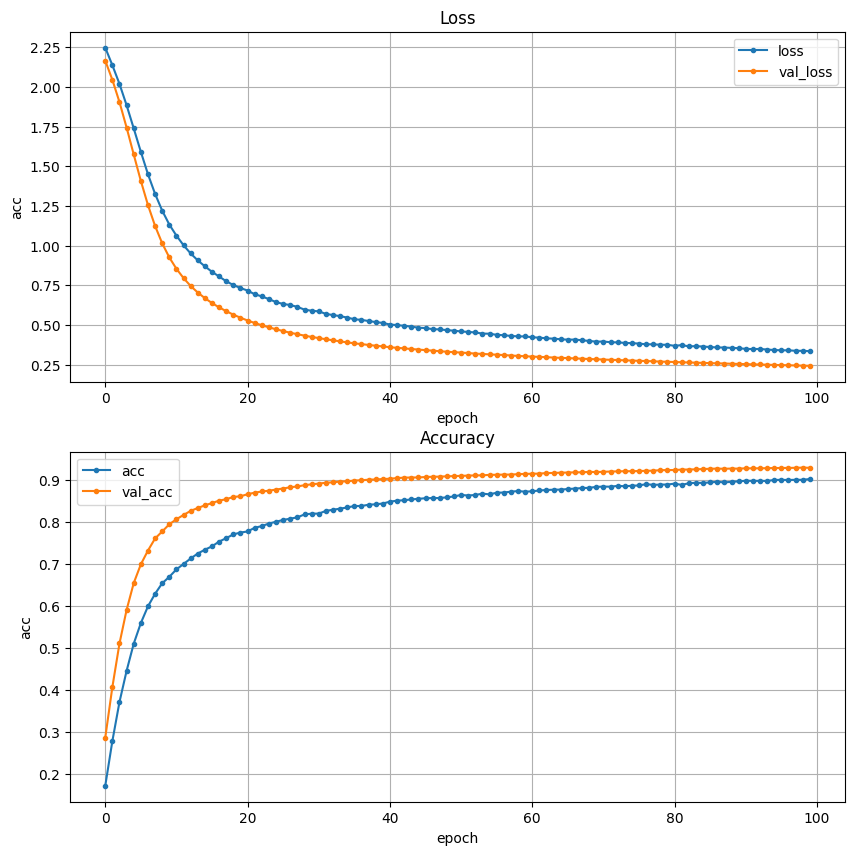

In [3]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.savefig('./output/result.png')
plt.show()

In [17]:
import numpy as np
from PIL import Image

data = np.array(Image.open('input/6.png').convert('L'))

x_pre = data.reshape(1, 784)
x_pre = x_pre.astype('float32')
x_pre /= 255
y_pre = model.predict(x_pre)
print(y_pre)
print(np.argmax(y_pre[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[1.6520346e-02 8.1605038e-05 4.1523363e-02 2.3071603e-03 3.4538105e-02
  2.6085716e-01 3.7298787e-01 4.5844454e-06 2.7075669e-01 4.2309114e-04]]
6
